# Gathering

In [1]:
import pandas as pd
import numpy as np
import tweepy
import os
import re
import json 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import warnings
import requests
warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
# load twitter-archive-enhanced.csv
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [19]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [119]:
df_archive['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Toby           7
Bailey         7
Buddy          7
an             7
Daisy          7
Dave           6
Jack           6
Scout          6
Milo           6
Jax            6
Oscar          6
Leo            6
Koda           6
Rusty          6
Stanley        6
Bella          6
Sunny          5
            ... 
Iggy           1
Grady          1
Brian          1
Deacon         1
Cupid          1
Emma           1
Puff           1
Marq           1
Ralf           1
Boston         1
Kallie         1
Gin            1
Durg           1
Craig          1
Cheesy         1
Poppy          1
Kara           1
Alejandro      1
Cannon         1
Sandra         1
General        1
Fynn           1
Clifford       1
Tonks          1
Staniel        1
Huxley         1
Lipton         1
Laela         

In [3]:

# downloading and saving the image prediction data using requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = 'image-predictions.tsv'
response =requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name,'wb')as file:
        file.write(response.content)


In [14]:
df_image =pd.read_csv('image-predictions.tsv',sep ='\t')
df_image.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [9]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


df_archive= df_1.tweet_id.values
len(df_archive)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in df_archive:
        count += 1
        print(str(count) + ": " + str(df_archive))
        try:
            tweet = api.get_status(df_archive, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


NameError: name 'OAuthHandler' is not defined

In [15]:
# read json file line by line
df_list =[]
with open('tweet-json.txt','r') as f:
    for line in f:
        tweet = json.loads(line)
        df_list.append(tweet)
df_api = pd.DataFrame(df_list,columns = ['id','retweet_count','favorite_count'])
df_api.head(10)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [16]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


# Assess

### quality issues###

- missing retweeted information( status id, status user id,status timestamp)
- missing information in (replay to status id,in replay to user id) (twitter archive)
- timestamp type should be datatime rather than object  (twitter archive)
- (id) type should be string rather than int64  (twitter archive)
- wrong in names information extract from text  (twitter archive)
- outliers in rating nomunator values according to number summary(twitter archive)
- in rating numerator there are int64 howaver there are decimal number( 13.5 )
- 281 tweet don't contain image (twitter archive)
- in rating denominatoe there are value more than 10 like(110,120,...)

### tideness issues###

- values(doggo, floofer,pupper,puppo)are column names  (twitter archive)
- (p1,p1_conf,p1_dog),(p2,p2_conf,p2_dog), and(p3,p3_conf,p3_dog) are multiple types of observational unites are stored in the same table



# Cleaning

In [250]:
archive_clean=df_archive.copy()
image_clean=df_image.copy()
api_clean=df_api.copy()

# Define
- remove tweet without image from archive_clean and image_clean

# code

In [25]:
tweet_with_image= list(image_clean.tweet_id.unique())
len(tweet_with_image)== archive_clean.tweet_id.isin(tweet_with_image).sum()
archive_clean = archive_clean[archive_clean.tweet_id.isin(tweet_with_image)]

# test

In [26]:
archive_clean.shape

(2075, 17)

# define
- in image clean table,replace the names of columns as well as the columns of(p1,p2,p3) compine them in one column under the name of prediction,the columns of(p1_conf,p2_conf,p3_conf) copin them under the name of confidence,and the coulmns of(p1_dog,p2_dog,p3_dog)compine under the name of breed.

# code

In [27]:
cols =['tweet_id','jpg_url','img_num',
       'prediction_1','confidence_1','breed_1',
       'prediction_2','confidence_2','breed_2',
       'prediction_3','confidence_3','breed_3']
image_clean.columns=cols
test = pd.wide_to_long(image_clean,stubnames=['prediction','confidence','breed'],
                i=['tweet_id','jpg_url','img_num'],
                 j="prediction_level" ,sep='_',suffix='\d+').reset_index()
image_clean = test

# test

In [28]:
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_level', 'prediction',
       'confidence', 'breed'],
      dtype='object')

# define
- remove( status id, status user id,status timestamp ,replay to status id,in replay to user id)

# code

In [29]:
tweets_with_image = list(image_clean.tweet_id.unique())
len(tweets_with_image) == archive_clean.tweet_id.isin(tweets_with_image).sum()
archive_clean = archive_clean[archive_clean.tweet_id.isin(tweets_with_image)]
retweet_entries = archive_clean.retweeted_status_id.notnull()
archive_clean[retweet_entries].shape[0]
archive_clean= archive_clean[~retweet_entries]
replay_entries = archive_clean.in_reply_to_status_id.notnull()
archive_clean[replay_entries].shape[0]
archive_clean = archive_clean[~replay_entries]

In [30]:
np.logical_not(image_clean.tweet_id.isin(list(archive_clean.tweet_id)))

image_clean=image_clean[~np.logical_not(image_clean.tweet_id.isin(list(archive_clean.tweet_id)))]

# test

In [31]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

# define
- convert time stamp from object to datetime

# code

In [32]:
archive_clean['timestamp'] =pd.to_datetime(archive_clean['timestamp'])

# test

In [33]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
dtypes: datetime64[ns](1), float

# define
- change id type from int to object

# code

In [34]:
archive_clean['tweet_id'] = archive_clean.tweet_id.astype(np.int64).astype(str)
api_clean['id'] =archive_clean.tweet_id.astype(np.int64).astype(str)
image_clean['tweet_id'] = archive_clean.tweet_id.astype(np.int64).astype(str)


# test

In [35]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1971 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
dtypes: datetime64[ns](1), floa

# define
- extract rating numerator from text and convert it to float type

# code

In [36]:
archive_clean['rating_numerator'] = archive_clean.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}',expand = False).astype('float')

 # test

In [37]:
archive_clean['rating_numerator'].value_counts()

12.00      446
10.00      417
11.00      392
13.00      253
9.00       150
8.00        95
7.00        52
14.00       33
6.00        32
5.00        32
3.00        19
4.00        16
2.00         9
1.00         5
60.00        1
24.00        1
99.00        1
1776.00      1
13.50        1
11.27        1
165.00       1
11.26        1
0.00         1
84.00        1
9.75         1
45.00        1
88.00        1
144.00       1
44.00        1
121.00       1
204.00       1
50.00        1
80.00        1
420.00       1
Name: rating_numerator, dtype: int64

# define
- calculating the dogs counts in the tweets featuring many dogs to define the number to divide the rating numerator by it

# code

In [38]:
dog_count = archive_clean.rating_denominator[archive_clean['rating_numerator'] >= 40]/10
print(dog_count)
archive_clean.loc[archive_clean.rating_numerator >=40 ,['rating_numerator', 'rating_denominator']]= [archive_clean.rating_numerator[archive_clean.rating_numerator >=40]/dog_count ,10]

433      7.0
902     15.0
979      1.0
1120    17.0
1202     5.0
1228     9.0
1254     8.0
1274     5.0
1351     5.0
1433     4.0
1635    11.0
1779    12.0
1843     8.0
2074     1.0
Name: rating_denominator, dtype: float64


# test

In [93]:
archive_clean['rating_denominator'].value_counts()

10    1966
11       2
20       1
7        1
2        1
Name: rating_denominator, dtype: int64

# define
-in name columen remove mistake value (a,an) and extract the right value from text column and replace the lower case value with "".

# code

In [315]:
lower=list(archive_clean['name'].str.lower())
    
archive_clean.replace(lower,'',inplace=True)

In [316]:
pattern = re.compile('(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index , row in archive_clean.iterrows():
    try:
            if row['name'] =="a":
                c_name = re.findall(pattern, row['text'])[0]
                archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('a', c_name)
            elif row['name'] =='an':
                c_name = re.findall(pattern, row['text'])[0]
                archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('an', c_name)
            elif row['name']=='None':
                c_name = re.findall(pattern, row['text'])[0]
                archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('None', c_name)
    except IndexError:
                archive_clean.loc[index,'name'] = np.nan
archive_clean.name.value_counts(dropna=False)

              822
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
Sadie           8
Buddy           7
Toby            7
Bailey          7
Daisy           7
Scout           6
Jax             6
Oscar           6
Koda            6
Jack            6
Rusty           6
Dave            6
Bella           6
Stanley         6
Leo             6
Milo            6
Sammy           5
Bentley         5
Louis           5
Oakley          5
             ... 
Jeb             1
Guss            1
Fletcher        1
Iggy            1
Grady           1
Jazzy           1
Emma            1
Puff            1
Fynn            1
Durg            1
Craig           1
Deacon          1
Poppy           1
Kara            1
Alejandro       1
Ralf            1
Cannon          1
General         1
Clifford        1
Sabertooth      1
Tonks           1
Staniel         1
Huxley          1
Lipton          1
Hero      

# test

In [317]:
archive_clean['name'].str.islower().value_counts()

False    2356
Name: name, dtype: int64

# define
- replace the (None) with ("") in (doggo,floofer,pupper,puppo) columns then compin them in one coulmn under the name of dog breed

# code

In [40]:
(archive_clean.loc[:,'doggo':"puppo"] !='none').sum()
nonunique = archive_clean[(archive_clean['doggo']!='none')&(archive_clean['pupper']!='none')]
nonunique.iloc[:,-4:].head()


,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


In [41]:
archive_clean['doggo'].replace('None','',inplace=True)
archive_clean['floofer'].replace('None','',inplace=True)
archive_clean["puppo"].replace('None','',inplace=True)
archive_clean['pupper'].replace('None','',inplace=True)                                
archive_clean['dog_breed']=archive_clean['doggo']+archive_clean['floofer']+archive_clean['puppo']+archive_clean['pupper']
archive_clean.drop(columns=['doggo','floofer','puppo','pupper'],axis=1,inplace=True)    

# test

In [43]:
archive_clean.dog_breed.value_counts()

                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_breed, dtype: int64

# define
- merge archive table,image table,and api table in one table using join function

# code

In [49]:
clean = pd.merge(archive_clean,image_clean)
clean = pd.merge(clean,api_clean,left_on ='tweet_id',right_on='id')
clean= clean.drop(columns=['id'])

# test

In [51]:
clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_breed', 'jpg_url', 'img_num',
       'prediction_level', 'prediction', 'confidence', 'breed',
       'retweet_count', 'favorite_count'],
      dtype='object')

# visualization

In [52]:
avg_retweet_count_dog_breed = clean.groupby('dog_breed').retweet_count.mean()
avg_retweet_count_dog_breed.index
avg_favorite_count_dog_breed=clean.groupby('dog_breed').favorite_count.mean()

In [53]:
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,7)})

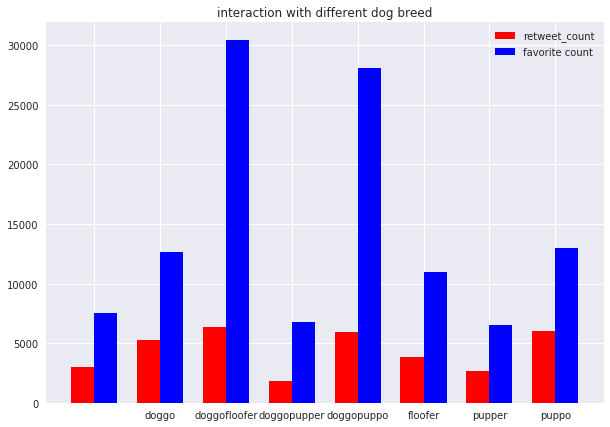

In [54]:
width=0.35
ind=np.arange(len(avg_favorite_count_dog_breed))
labels =avg_retweet_count_dog_breed.index
location=ind + width /2

plt.bar(ind,avg_retweet_count_dog_breed , width,color='r',alpha=1, label='retweet_count')
plt.bar(ind+width,avg_favorite_count_dog_breed, width, color='b', alpha=1,label='favorite count')


plt.title('interaction with different dog breed')
plt.xticks(location, labels)
plt.legend()

# insights
- The most favorite single dog breed is (puppo) as well as the retweet count in individual category of dog breed. However, we cannot ignore the slightly different with (doggo) breed. 
- According to double category of dog breed, (doggo – floofer) is the most favorite for the people as well as the retweet count. 
- However, (puppo) is the highest in individual category, (doggo-puppo) in double category are the second highest bar in the chart above for both favorite and retweet count. 
P 
- (Pupper) is the lowest dog breed in both individual and double categories.
-  There are many people prefer unpopular dog breed.   


In [55]:
clean.to_csv('clean.csv',index=False)